In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
df = df.drop(['ID','Bedtime','Wakeup time'],axis=1)
df = df.dropna()
df.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df=df.replace("Male",0)
df=df.replace("Female",1)
df=df.replace("No",0)
df=df.replace("Yes",1)

In [5]:
X_res = df.drop(['Sleep efficiency'],axis=1).values
y_res = df[['Sleep efficiency']]
scaler = StandardScaler()
y_res = scaler.fit_transform(y_res)
y_res

array([[ 0.66956732],
       [-0.95367228],
       [ 0.74335093],
       [-2.06042655],
       [-0.2158361 ],
       [-1.83907569],
       [ 0.81713455],
       [ 0.00551475],
       [-1.76529208],
       [ 0.96470179],
       [ 1.03848541],
       [ 1.03848541],
       [-1.10123951],
       [-1.83907569],
       [ 0.96470179],
       [-1.83907569],
       [-2.13421017],
       [ 1.4074035 ],
       [-0.58475419],
       [ 0.37443284],
       [ 1.4074035 ],
       [ 0.89091817],
       [ 0.37443284],
       [-1.0274559 ],
       [ 0.89091817],
       [-1.61772484],
       [-0.80610504],
       [-1.76529208],
       [ 1.11226902],
       [-1.10123951],
       [ 0.5957837 ],
       [ 0.5957837 ],
       [-1.17502313],
       [ 0.30064923],
       [ 0.30064923],
       [-1.4701576 ],
       [ 0.5957837 ],
       [-0.14205248],
       [ 0.52200008],
       [ 0.89091817],
       [-0.58475419],
       [ 0.15308199],
       [ 0.15308199],
       [-0.58475419],
       [-0.58475419],
       [-1

In [6]:
modelos = [('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())]

In [7]:
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_MAPE = []

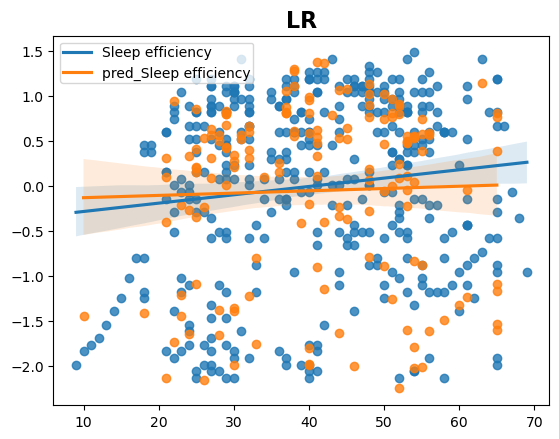

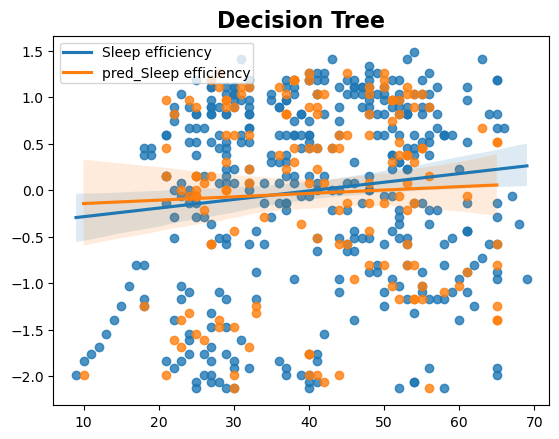

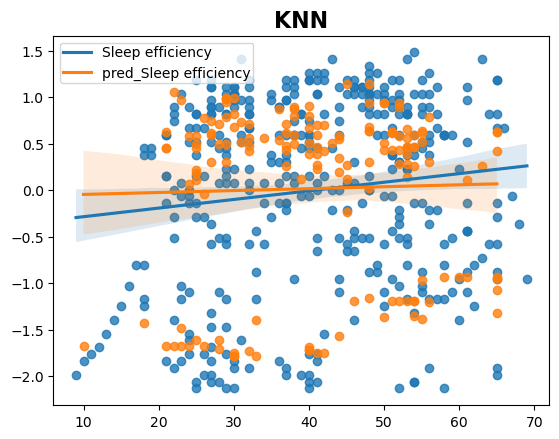

In [8]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = y_res, line_kws={'label': 'Sleep efficiency'})
    sns.regplot(x = np.array(X_test)[:,0], y = y_pred, line_kws={'label': 'pred_Sleep efficiency'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test,y_pred)))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test,y_pred)**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,mean_absolute_percentage_error(y_test,y_pred)))

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [9]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.89926942])),
 ('LR', array([0.8989964])),
 ('KNN', array([0.86664461]))]

In [10]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.80868548])),
 ('LR', array([0.80819452])),
 ('KNN', array([0.75107288]))]

In [11]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('Decision Tree', 50094.586467628214),
 ('KNN', 43.13777927473765),
 ('LR', 32.89954361046969)]

In [12]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.4314449763845008),
 ('LR', 0.3729936625977236),
 ('Decision Tree', 0.35709379211828335)]

In [13]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('KNN', 2.880601883599397),
 ('LR', 2.181277350698854),
 ('Decision Tree', 1.8011855339888132)]

In [14]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.2765242261201132),
 ('Decision Tree', 0.211235044032096),
 ('LR', 0.21089451032352366)]

In [15]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.5258557084601375),
 ('Decision Tree', 0.4596031375350869),
 ('LR', 0.4592325231552352)]

In [16]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()

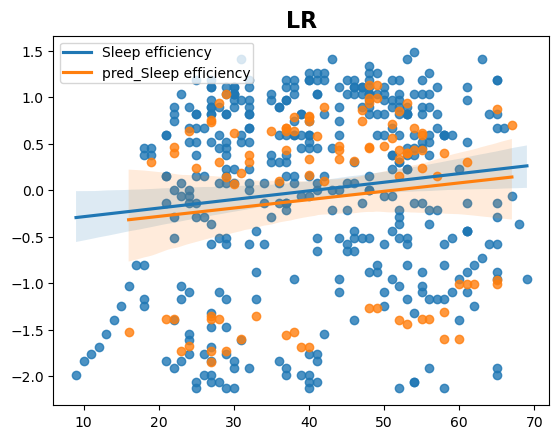

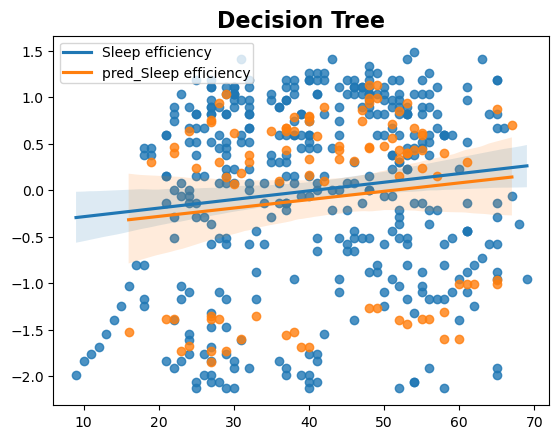

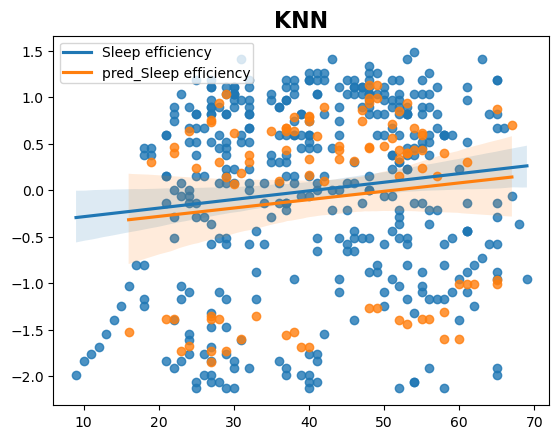

In [17]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
MAPE = [0,0,0]

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #MAPE (Mean Absolute Percentage Error)
        MAPE[j] += mean_absolute_percentage_error(y_test,y_pred)
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = y_res, line_kws={'label': 'Sleep efficiency'})
    sns.regplot(x = np.array(X_test)[:,0], y = y_pred, line_kws={'label': 'pred_Sleep efficiency'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,MAPE[j]/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [18]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.89429535])),
 ('LR', array([0.89235776])),
 ('KNN', array([0.86091462]))]

In [19]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.80012165])),
 ('LR', array([0.79658349])),
 ('KNN', array([0.74194013]))]

In [20]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('Decision Tree', 19080.03163507905),
 ('KNN', 26.070246796568764),
 ('LR', 20.33519951438814)]

In [21]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.4164337256380634),
 ('LR', 0.3682703250163681),
 ('Decision Tree', 0.3452616927675054)]

In [22]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('KNN', 2.507128413463244),
 ('LR', 1.981623915504195),
 ('Decision Tree', 1.783318845387811)]

In [23]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.26876543089246147),
 ('Decision Tree', 0.21643075385120716),
 ('LR', 0.2096412321070943)]

In [24]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.5172578395568485),
 ('Decision Tree', 0.46350784860584404),
 ('LR', 0.4572871450680624)]

In [25]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MAPE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

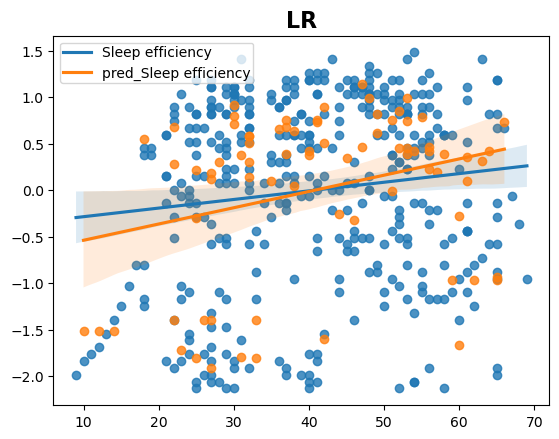

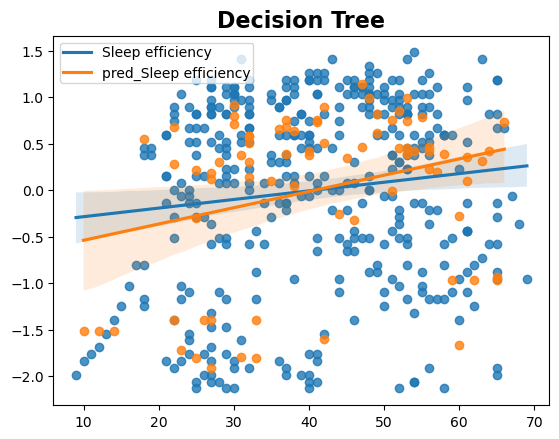

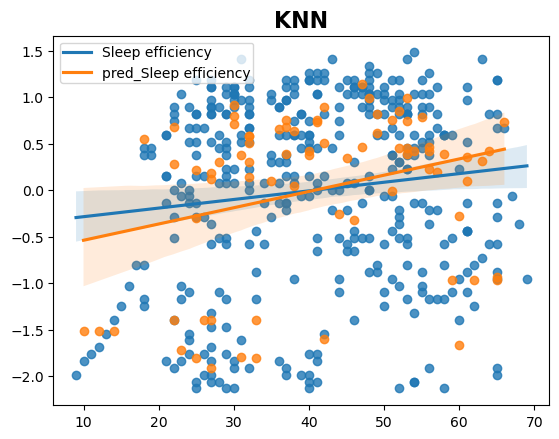

In [26]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
MAPE = [0,0,0]
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X_res):
    j=0
    X_train, X_test, y_train, y_test = X_res[train], X_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #MAPE (Mean Absolute Percentage Error)
        MAPE[j] += mean_absolute_percentage_error(y_test,y_pred)
        
        j += 1

j=0
for nombre, modelo in modelos:
    
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
        
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = y_res, line_kws={'label': 'Sleep efficiency'})
    sns.regplot(x = np.array(X_test)[:,0], y = y_pred, line_kws={'label': 'pred_Sleep efficiency'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,MAPE[j]/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [27]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.89173321])),
 ('LR', array([0.89158747])),
 ('KNN', array([0.85949843]))]

In [28]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.79633088])),
 ('LR', array([0.79501713])),
 ('KNN', array([0.73961263]))]

In [29]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('Decision Tree', 11758.834436276058),
 ('KNN', 20.591034355192875),
 ('LR', 16.176201604961193)]

In [30]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.4121671327286015),
 ('LR', 0.36760717060786413),
 ('Decision Tree', 0.33370440979046023)]

In [31]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('KNN', 2.6974132721622235),
 ('LR', 2.1063785350913826),
 ('Decision Tree', 1.8705758064053093)]

In [32]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.2653412181577113),
 ('Decision Tree', 0.21545928263312364),
 ('LR', 0.20840434620812628)]

In [33]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.513734451926246),
 ('Decision Tree', 0.4609215374992074),
 ('LR', 0.45635476001046626)]

In [34]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MAPE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()